# Main Package Imports

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from matplotlib_venn import venn2, venn2_circles
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
import random

plt.rcParams["figure.figsize"] = [20, 12]
# %matplotlib inline

# Data Import

In [377]:
proteomics_ack = pd.read_excel("data/AcK_FINAL.xlsx", sheet_name="Fold Change by Protein Type", skiprows=10)

proteomics_total = pd.read_excel("data/TotalProteome_FINAL.xlsx", sheet_name="Fold Change - Protein", skiprows=10)
proteomics_total

,Index,Gene Name,Protein Name,Sample 2 : Sample 1,Sample 3 : Sample 1,Sample 3 : Sample 2,Sample 2 : Sample 1.1,Sample 3 : Sample 1.1,Sample 3 : Sample 2.1,Accession,...,Sample 3 : Sample 2.3,Sample 2 : Sample 1.4,Sample 3 : Sample 1.4,Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Sample 2 : Sample 1.6,Sample 3 : Sample 1.6,Sample 3 : Sample 2.6
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.0023754,0.0203162,0.0197374,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.0023754,0.0203162,0.0197374
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,–,–,–,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,–,–,–
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.0264656,0.0353425,0.0515386,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.0264656,0.0353425,0.0515386
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.35526,0.0124267,0.00212659,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.35526,0.0124267,0.00212659
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.53045,0.0229238,0.0649769,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.53045,0.0229238,0.0649769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.0263124,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.0263124
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.00559283,0.975061,0.00615854,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.00559283,0.975061,0.00615854
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242002,0.342034,6.16575e-05,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242002,0.342034,6.16575e-05


# Data Cleaning

## Examining overall shape and information of the data

In [378]:
print("proteomics_ack shape is ", proteomics_ack.shape)
print()

print(proteomics_ack.head())
print()

print(proteomics_ack.describe())

print("proteomics_total shape is ", proteomics_total.shape)
print()

print(proteomics_total.head())
print()

print(proteomics_total.describe())

proteomics_ack shape is  (887, 101)

   Index   Index in Detail  Sample 2 : Sample 1 Sample 3 : Sample 1  \
0      1  Adaptor/scaffold                  NaN                 NaN   
1      2                35            23.655555             1.10431   
2      3                36             3.631596             -2.0099   
3      4                37             3.144754             2.99733   
4      5                48             8.843813             1.87013   

   Sample 3 : Sample 2  Max Abundance  Max % CV Gene Name  Protein Name  \
0                  NaN            NaN       NaN       NaN           NaN   
1           -23.409127   2.456167e+07  0.643131       Fgb           FGB   
2            -7.976540   1.991868e+07  0.324883       Fgb           FGB   
3            -1.146557   2.710754e+06  0.622032   Lpp;Lpp  LPP;LPP iso4   
4            -5.167873   5.383860e+06  0.675029     Rai14         RAI14   

      Site  ... Run 1 Sample 2 : Sample 1.4 Run 1 Sample 3 : Sample 1.4  \
0      NaN

## Column Information

In [379]:
print(proteomics_total.columns)
print()
print(proteomics_ack.columns)

Index(['Index', 'Gene Name', 'Protein Name', 'Sample 2 : Sample 1',
       'Sample 3 : Sample 1', 'Sample 3 : Sample 2', 'Sample 2 : Sample 1.1',
       'Sample 3 : Sample 1.1', 'Sample 3 : Sample 2.1', 'Accession',
       'Description', 'Protein Type', 'Peptide Count', 'Sample 1 (126)',
       'Sample 2 (127b)', 'Sample 3 (130b)', 'Sample 1 (126).1',
       'Sample 2 (127b).1', 'Sample 3 (130b).1', 'Sample 2 : Sample 1.2',
       'Sample 3 : Sample 1.2', 'Sample 3 : Sample 2.2',
       'Sample 2 : Sample 1.3', 'Sample 3 : Sample 1.3',
       'Sample 3 : Sample 2.3', 'Sample 2 : Sample 1.4',
       'Sample 3 : Sample 1.4', 'Sample 3 : Sample 2.4',
       'Sample 2 : Sample 1.5', 'Sample 3 : Sample 1.5',
       'Sample 3 : Sample 2.5', 'Sample 2 : Sample 1.6',
       'Sample 3 : Sample 1.6', 'Sample 3 : Sample 2.6'],
      dtype='object')

Index(['Index', 'Index in Detail', 'Sample 2 : Sample 1',
       'Sample 3 : Sample 1', 'Sample 3 : Sample 2', 'Max Abundance',
       'Max % CV', 'G

## Renaming the columns for both sets of data

In [380]:
# Ack Proteome Data Set
# Renaming the fold change columns
proteomics_ack.rename(columns={"Sample 2 : Sample 1": "nfc_s2vs1", 
                "Sample 3 : Sample 1": "nfc_s3vs1",
                "Sample 3 : Sample 2": "nfc_s3vs2"}, inplace=True)



# Total Proteome Data Set

# Renaming the fold change columns
proteomics_total.rename(columns={"Sample 2 : Sample 1": "nfc_s2vs1", 
                "Sample 3 : Sample 1": "nfc_s3vs1",
                "Sample 3 : Sample 2": "nfc_s3vs2"}, inplace=True)

# Renaming the p value columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.1": "pv_s2vs1", 
                "Sample 3 : Sample 1.1": "pv_s3vs1",
                "Sample 3 : Sample 2.1": "pv_s3vs2"}, inplace=True)

# Renaming the Sum Signal : Noise columns
proteomics_total.rename(columns={"Sample 1 (126)": "ss_Sample_1_126", 
                "Sample 2 (127b)": "ss_Sample_2_127b",
                "Sample 3 (130b)": "ss_Sample_3_130b"}, inplace=True)

# Renaming the Normalized Sum Signal : Noise columns
proteomics_total.rename(columns={"Sample 1 (126).1": "nss_Sample_1_126", 
                "Sample 2 (127b).1": "nss_Sample_2_127b",
                "Sample 3 (130b).1": "nss_Sample_3_130b"}, inplace=True)

# Renaming the raw ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.2": "rr_s2vs1", 
                "Sample 3 : Sample 1.2": "rr_s3vs1",
                "Sample 3 : Sample 2.2": "rr_s3vs2"}, inplace=True)

# Renaming the Log2 ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.3": "log2_s2vs1", 
                "Sample 3 : Sample 1.3": "log2_s3vs1",
                "Sample 3 : Sample 2.3": "log2_s3vs2"}, inplace=True)

# Renaming the Normalized Log2 Ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.4": "norm_log2_s2vs1", 
                "Sample 3 : Sample 1.4": "norm_log2_s3vs1",
                "Sample 3 : Sample 2.4": "norm_log2_s3vs2"}, inplace=True)

# Renaming the second Normalized Fold Change columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.5": "norm_fc2_s2vs1", 
                "Sample 3 : Sample 1.5": "norm_fc2_s3vs1",
                "Sample 3 : Sample 2.5": "norm_fc2_s3vs2"}, inplace=True)


# Renaming the second p-value columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.6": "pv2_s2vs1", 
                "Sample 3 : Sample 1.6": "pv2_s3vs1",
                "Sample 3 : Sample 2.6": "pv2_s3vs2"}, inplace=True)

# proteomics_ack
proteomics_total = proteomics_total.replace(to_replace="–", value=0)
proteomics_total

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,pv_s2vs1,pv_s3vs1,pv_s3vs2,Accession,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


## Eliminating un-nessesary columns

In [381]:
proteomics_ack = proteomics_ack[proteomics_ack['nfc_s2vs1'].notna()]
proteomics_ack


,Index,Index in Detail,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,2,35,23.655555,1.10431,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse
2,3,36,3.631596,-2.0099,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,4,37,3.144754,2.99733,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse
4,5,48,8.843813,1.87013,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,6,68,3.454298,4.7209,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,5581,4.354904,-1.03223,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse
882,883,5582,14.425522,-3.8181,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,884,5583,130.183213,3.09442,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,885,5585,3.803267,-3.47581,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


## Missing Value Correction

In [382]:
# Total Proteome Data
proteomics_total = proteomics_total.replace(to_replace="–", value=0)
proteomics_total['nfc_s2vs1'] = proteomics_total['nfc_s2vs1'].replace(to_replace=0, value=proteomics_total['nfc_s2vs1'].mean())
proteomics_total['nfc_s2vs1'] = proteomics_total['nfc_s2vs1'].replace(np.nan, proteomics_total['nfc_s2vs1'].mean())
proteomics_total['nfc_s3vs1'] = proteomics_total['nfc_s3vs1'].replace(to_replace=0, value=proteomics_total['nfc_s3vs1'].mean())
proteomics_total['nfc_s3vs1'] = proteomics_total['nfc_s3vs1'].replace(np.nan, proteomics_total['nfc_s3vs1'].mean())
proteomics_total['nfc_s3vs2'] = proteomics_total['nfc_s3vs2'].replace(to_replace=0, value=proteomics_total['nfc_s3vs2'].mean())
proteomics_total['nfc_s3vs2'] = proteomics_total['nfc_s3vs2'].replace(np.nan, proteomics_total['nfc_s3vs2'].mean())

print(proteomics_total.iloc[:, 0:7].head(3))

# Ack Proteome Data

proteomics_ack = proteomics_ack.replace(to_replace="–", value=0)
proteomics_ack['nfc_s2vs1'] = proteomics_ack['nfc_s2vs1'].replace(to_replace=0, value=proteomics_ack['nfc_s2vs1'].mean())
proteomics_ack['nfc_s2vs1'] = proteomics_ack['nfc_s2vs1'].replace(np.nan, proteomics_ack['nfc_s2vs1'].mean())
proteomics_ack['nfc_s3vs1'] = proteomics_ack['nfc_s3vs1'].replace(to_replace=0, value=proteomics_ack['nfc_s3vs1'].mean())
proteomics_ack['nfc_s3vs1'] = proteomics_ack['nfc_s3vs1'].replace(np.nan, proteomics_ack['nfc_s3vs1'].mean())
proteomics_ack['nfc_s3vs2'] = proteomics_ack['nfc_s3vs2'].replace(to_replace=0, value=proteomics_ack['nfc_s3vs2'].mean())
proteomics_ack['nfc_s3vs2'] = proteomics_ack['nfc_s3vs2'].replace(np.nan, proteomics_ack['nfc_s3vs2'].mean())

print("\n\n",proteomics_ack.iloc[:, 1:7].head(3))

   Index Gene Name Protein Name  nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  pv_s2vs1
0      1      Abat         ABAT  -6.743289  -2.169717   3.155556  0.002375
1      2     Abcd3        ABCD3  -2.748379  -1.410763   1.978015  0.000000
2      3    Acaa1b       ACAA1b  -9.654748  -3.975903   2.465541  0.026466


    Index in Detail  nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  Max Abundance  Max % CV
1               35  23.655555   1.104311 -23.409127   2.456167e+07  0.643131
2               36   3.631596  -2.009896  -7.976540   1.991868e+07  0.324883
3               37   3.144754   2.997329  -1.146557   2.710754e+06  0.622032


# Exploratory Histogram / Density plot

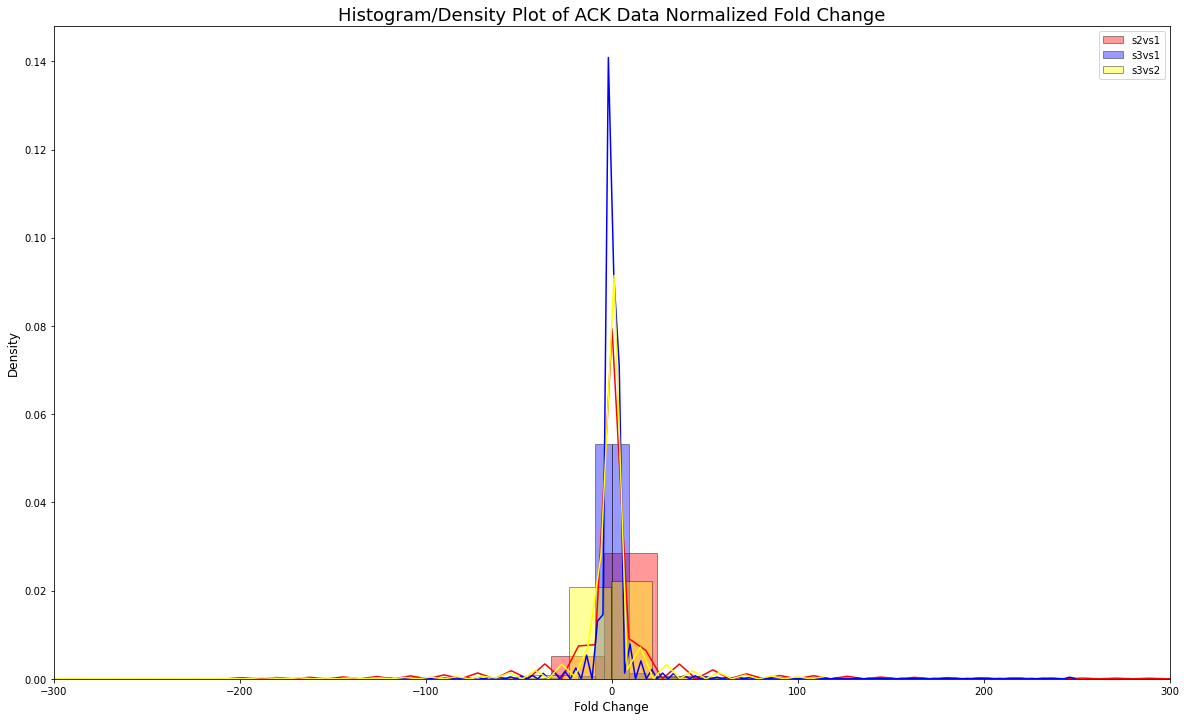

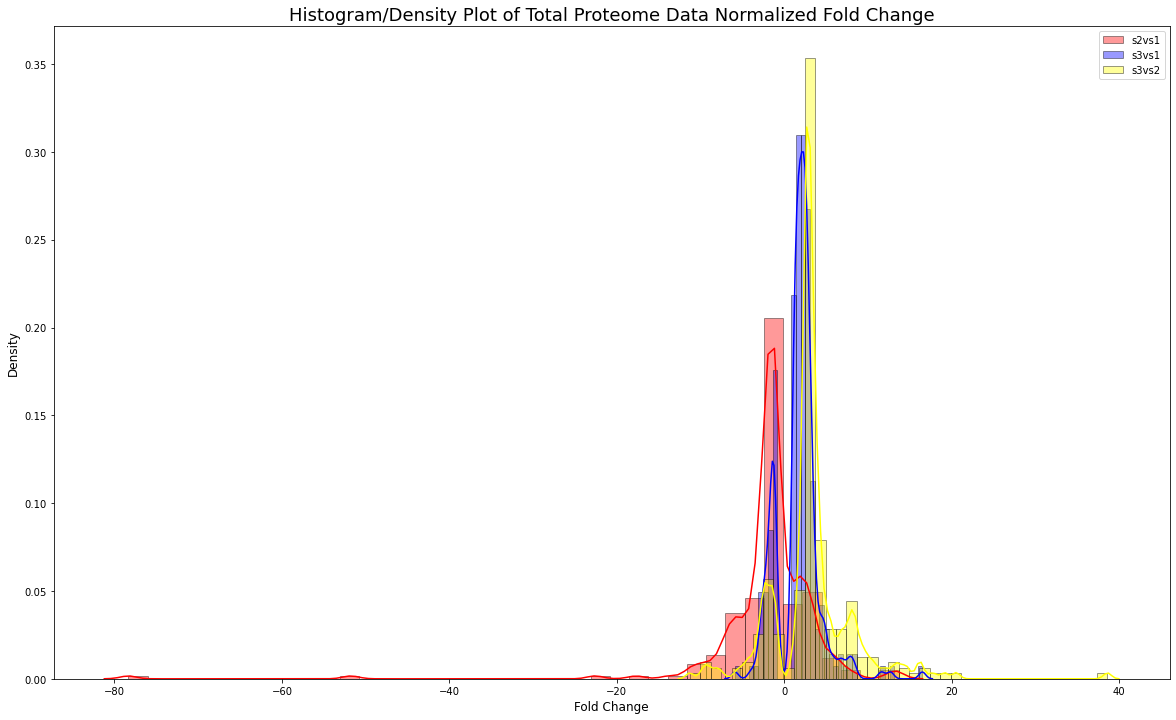

In [383]:
nfc_plot_data_ack = proteomics_ack.iloc[:, 2:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack = nfc_plot_data_ack.replace(np.nan,0)

sns.distplot(nfc_plot_data_ack["nfc_s2vs1"], bins=40, label="s2vs1",color='red',hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_ack["nfc_s3vs1"], bins=40, label="s3vs1", color='blue', hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_ack["nfc_s3vs2"], bins=40, label="s3vs2", color='yellow', hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of ACK Data Normalized Fold Change", fontsize= 18)
plt.xlim(-300, 300)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.legend();
plt.show();

nfc_plot_data_total = proteomics_total.iloc[:, 3:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total = nfc_plot_data_total.replace(np.nan,0)

sns.distplot(nfc_plot_data_total["nfc_s2vs1"], bins=40, label="s2vs1", color='red',hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_total["nfc_s3vs1"], bins=40, label="s3vs1", color='blue', hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_total["nfc_s3vs2"], bins=40, label="s3vs2", color='yellow', hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of Total Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.legend();
plt.show();


# Exploritory Parallel Coordinate Plots

In [384]:
col = proteomics_ack.pop("Index")
proteomics_ack.insert(1, col.name, col)
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,35,2,23.655555,1.104311,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse
2,36,3,3.631596,-2.009896,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,37,4,3.144754,2.997329,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse
4,48,5,8.843813,1.870128,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,68,6,3.454298,4.720901,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.032229,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse
882,5582,883,14.425522,-3.818102,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,5583,884,130.183213,3.094416,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,5585,885,3.803267,-3.475807,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


In [385]:
print("No.of.unique values :" , len(pd.unique(proteomics_total["Protein Name"])))

print("Total number of values :", len(proteomics_total["Protein Name"]))
proteomics_total

No.of.unique values : 254
Total number of values : 254


,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,pv_s2vs1,pv_s3vs1,pv_s3vs2,Accession,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


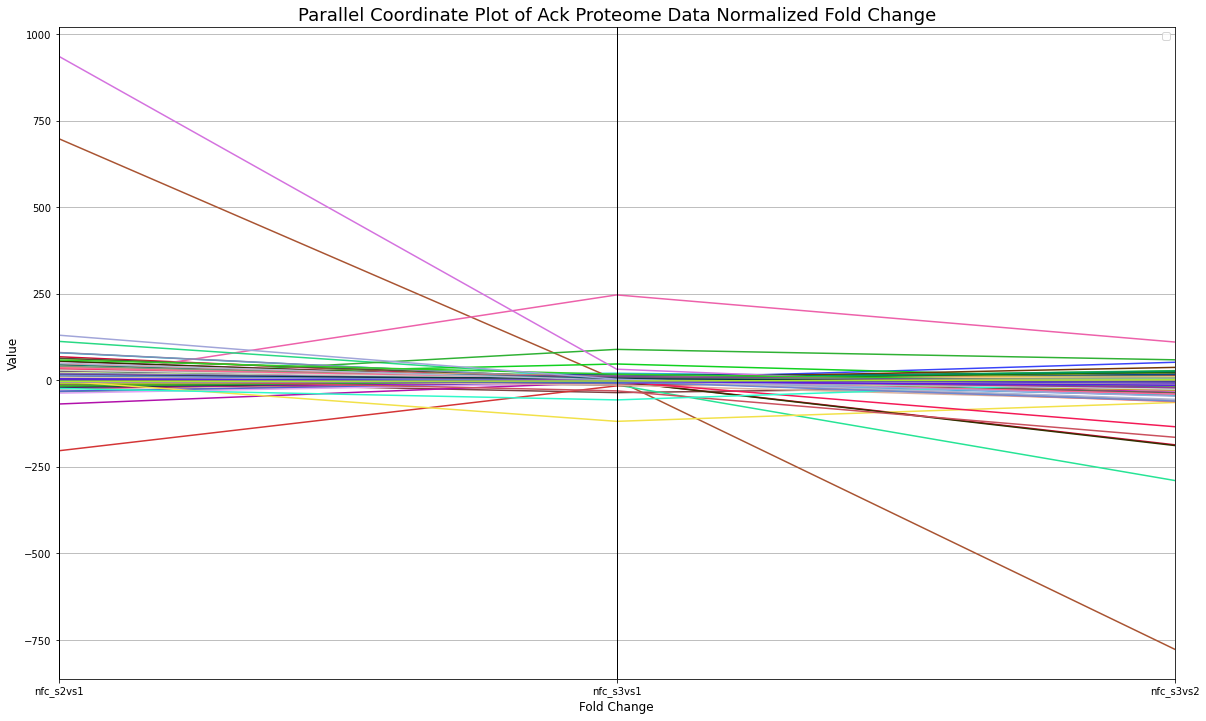

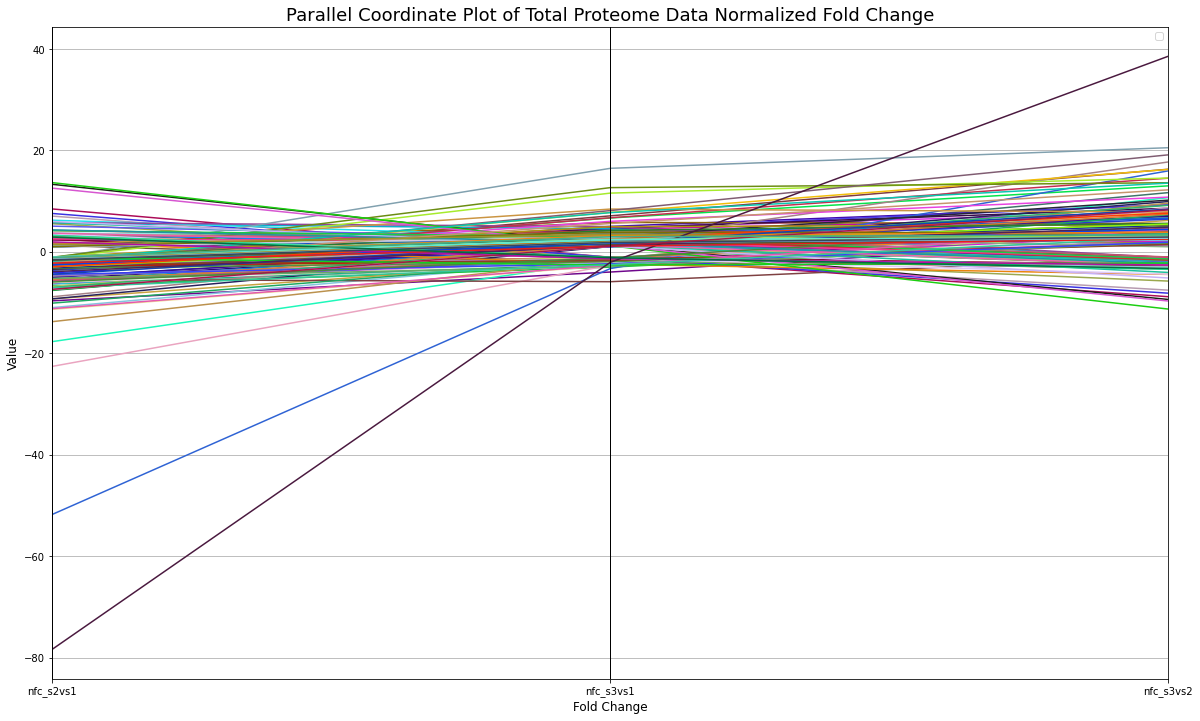

In [386]:
# Ack Proteome Data
nfc_plot_data_ack = proteomics_ack.iloc[:, 1:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack.replace(np.nan,0)
nfc_plot_data_ack

pd.plotting.parallel_coordinates(nfc_plot_data_ack, "Index")
plt.title("Parallel Coordinate Plot of Ack Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Value", fontsize=12);
plt.legend("");
plt.show();

# Total Proteome Data
nfc_plot_data_total = proteomics_total.iloc[:, 2:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total.replace(np.nan,0)

pd.plotting.parallel_coordinates(nfc_plot_data_total, "Protein Name")
plt.title("Parallel Coordinate Plot of Total Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Value", fontsize=12);
plt.legend("");
plt.show();

# Ordinal Regression/Slope

In [387]:

proteomics_ack['nfc_s3vs1'] = pd.to_numeric(proteomics_ack['nfc_s3vs1'],errors = 'coerce')
proteomics_ack = proteomics_ack.replace(np.nan,0)
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,35,2,23.655555,1.104311,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse
2,36,3,3.631596,-2.009896,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,37,4,3.144754,2.997329,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse
4,48,5,8.843813,1.870128,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,68,6,3.454298,4.720901,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.032229,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,0.000000,0.000000,0.000000,4.354904,-1.032229,-4.912453,mouse
882,5582,883,14.425522,-3.818102,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,5583,884,130.183213,3.094416,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,5585,885,3.803267,-3.475807,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


## Calculating the difference between the column values

In [388]:
proteomics_ack['diff_s2vs1_s3vs1'] = proteomics_ack.apply(lambda x: x['nfc_s2vs1'] - x['nfc_s3vs1'], axis=1)
proteomics_ack['diff_s3vs1_s3vs2'] = proteomics_ack.apply(lambda x: x['nfc_s3vs1'] - x['nfc_s3vs2'], axis=1)
proteomics_ack['diff_s2vs1_s3vs2'] = proteomics_ack.apply(lambda x: x['nfc_s2vs1'] - x['nfc_s3vs2'], axis=1)
proteomics_ack.head()

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
1,35,2,23.655555,1.104311,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682
2,36,3,3.631596,-2.009896,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136
3,37,4,3.144754,2.997329,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311
4,48,5,8.843813,1.870128,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685
5,68,6,3.454298,4.720901,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse,-1.266603,3.470292,2.203689


In [389]:
nfc_plot_data_total = proteomics_total.iloc[:, 3:6]
nfc_plot_data_ack = proteomics_ack.iloc[:, 2:5]
nfc_plot_data_ack.head()

,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2
1,23.655555,1.104311,-23.409127
2,3.631596,-2.009896,-7.976540
3,3.144754,2.997329,-1.146557
4,8.843813,1.870128,-5.167873
5,3.454298,4.720901,1.250609


## Linear and Ordinal Regression Functions

In [390]:
# https://stackoverflow.com/questions/69520967/how-to-get-the-slope-of-multiple-columns-in-python-data-frame
from sklearn.linear_model import LinearRegression
import mord

model = LinearRegression()
def get_coeff_linear(row, model=model):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

# https://pythonhosted.org/mord/
m = mord.OrdinalRidge()
def get_coeff_ordinal(row, model=m):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope


def perm_get_coeff_linear(row, model=model):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

def perm_get_coeff_ordinal(row, labels, model=m):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    # np.arange(len(row)).reshape(-1,1)
    model.fit(labels.reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

## Calculating slopes from normalized fold change values

In [391]:
ack_temp = pd.DataFrame()
total_temp = pd.DataFrame()

ack_temp["fc_slope_linear"] = nfc_plot_data_ack.apply(get_coeff_linear, axis=1)
total_temp["fc_slope_linear"] = nfc_plot_data_total.apply(get_coeff_linear, axis=1)

ack_temp["fc_slope_ordinal"] = nfc_plot_data_ack.apply(get_coeff_ordinal, axis=1)
total_temp["fc_slope_ordinal"] = nfc_plot_data_total.apply(get_coeff_ordinal, axis=1)

# print("Ack Data : \n\n", ack_temp.head(3))
# print("\nTotal Data : \n\n", total_temp.head(3))

nfc_plot_data_ack['fc_slope_linear'] = ack_temp["fc_slope_linear"]
nfc_plot_data_ack["fc_slope_ordinal"] = ack_temp["fc_slope_ordinal"]

nfc_plot_data_total['fc_slope_linear'] = total_temp["fc_slope_linear"]
nfc_plot_data_total['fc_slope_ordinal'] = total_temp["fc_slope_ordinal"]

print("Ack Data : \n\n", nfc_plot_data_ack.head(3))
print("\nTotal Data : \n\n", nfc_plot_data_total.head(3))

Ack Data : 

    nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  fc_slope_linear  fc_slope_ordinal
1  23.655555   1.104311 -23.409127       -23.532341        -15.688227
2   3.631596  -2.009896  -7.976540        -5.804068         -3.869379
3   3.144754   2.997329  -1.146557        -2.145656         -1.430437

Total Data : 

    nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  fc_slope_linear  fc_slope_ordinal
0  -6.743289  -2.169717   3.155556         4.949423          3.299615
1  -2.748379  -1.410763   1.978015         2.363197          1.575465
2  -9.654748  -3.975903   2.465541         6.060145          4.040096


### Linear and Ordinal Slope Scatter Plot

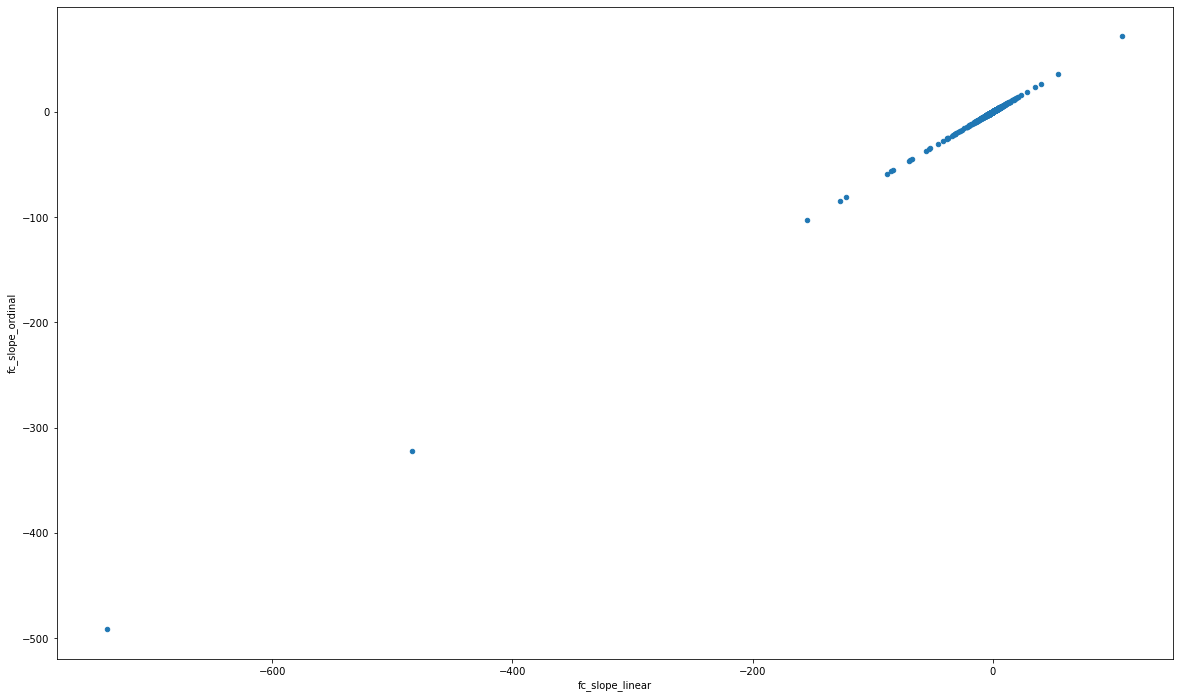

In [392]:
nfc_plot_data_ack.plot.scatter('fc_slope_linear', 'fc_slope_ordinal')

In [393]:

print("Ack Data : \n")
print("Smallest linear slopes : \n", nfc_plot_data_ack['fc_slope_linear'].nsmallest(10), "\n")
print("Smallest ordinal slopes : \n",nfc_plot_data_ack['fc_slope_ordinal'].nsmallest(10), "\n")

print("Largest linear slopes : \n", nfc_plot_data_ack['fc_slope_linear'].nlargest(10), "\n")
print("Largest ordinal slopes : \n",nfc_plot_data_ack['fc_slope_ordinal'].nlargest(10), "\n")

print("\nTotal Data : \n")
print("Smallest linear slopes : \n", nfc_plot_data_total['fc_slope_linear'].nsmallest(10), "\n")
print("Smallest ordinal slopes : \n",nfc_plot_data_total['fc_slope_ordinal'].nsmallest(10), "\n")

print("Largest linear slopes : \n", nfc_plot_data_total['fc_slope_linear'].nlargest(10), "\n")
print("Largest ordinal slopes : \n",nfc_plot_data_total['fc_slope_ordinal'].nlargest(10), "\n")

Ack Data : 

Smallest linear slopes : 
 147   -737.489978
665   -484.055411
247   -154.540940
60    -127.177818
666   -121.966951
883    -88.079005
770    -84.786767
781    -83.435686
88     -69.641962
714    -68.849341
Name: fc_slope_linear, dtype: float64 

Smallest ordinal slopes : 
 147   -491.659985
665   -322.703607
247   -103.027293
60     -84.785212
666    -81.311300
883    -58.719336
770    -56.524511
781    -55.623790
88     -46.427975
714    -45.899561
Name: fc_slope_ordinal, dtype: float64 

Largest linear slopes : 
 583    107.608133
218     54.200830
523     40.203297
216     35.296960
617     28.814087
543     23.373660
432     21.057506
155     21.025689
549     19.526710
359     19.018724
Name: fc_slope_linear, dtype: float64 

Largest ordinal slopes : 
 583    71.738755
218    36.133887
523    26.802198
216    23.531306
617    19.209391
543    15.582440
432    14.038337
155    14.017126
549    13.017807
359    12.679149
Name: fc_slope_ordinal, dtype: float64 


Total 

In [394]:
proteomics_ack.insert(5, nfc_plot_data_ack['fc_slope_linear'].name, nfc_plot_data_ack['fc_slope_linear'])
proteomics_ack.insert(6, nfc_plot_data_ack['fc_slope_ordinal'].name, nfc_plot_data_ack['fc_slope_ordinal'])
proteomics_ack.head()

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,2.456167e+07,0.643131,Fgb,...,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,1.991868e+07,0.324883,Fgb,...,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,2.710754e+06,0.622032,Lpp;Lpp,...,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311
4,48,5,8.843813,1.870128,-5.167873,-7.005843,-4.670562,5.383860e+06,0.675029,Rai14,...,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685
5,68,6,3.454298,4.720901,1.250609,-1.101845,-0.734563,3.814678e+07,0.232790,Ywhaz,...,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse,-1.266603,3.470292,2.203689


In [395]:
proteomics_total.insert(6, nfc_plot_data_total['fc_slope_linear'].name, nfc_plot_data_total['fc_slope_linear'])
proteomics_total.insert(7, nfc_plot_data_total['fc_slope_ordinal'].name, nfc_plot_data_total['fc_slope_ordinal'])
proteomics_total.head()

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,4.949423,3.299615,0.002375,0.020316,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,2.363197,1.575465,0.000000,0.000000,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,6.060145,4.040096,0.026466,0.035343,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,2.298235,1.532157,0.355260,0.012427,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.575398,0.383599,0.530450,0.022924,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977


### Distribution of ordinal slopes

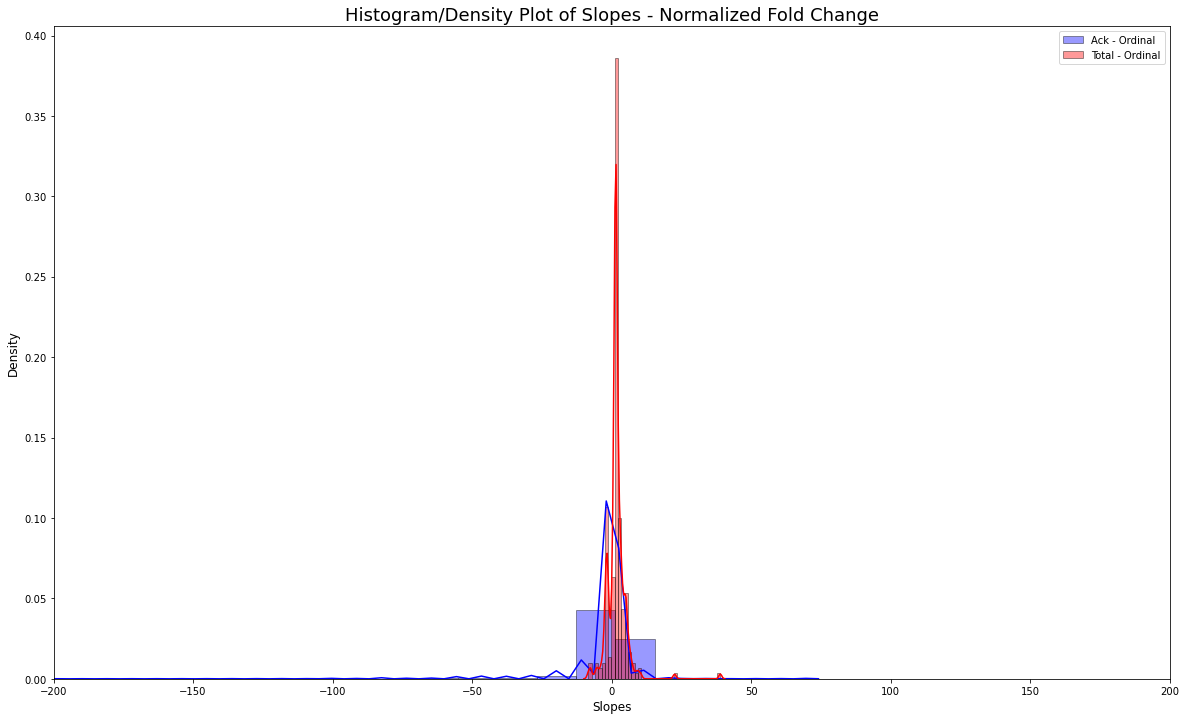

In [396]:
sns.distplot(proteomics_ack['fc_slope_ordinal'], bins=40, label="Ack - Ordinal", color='blue',hist_kws={"edgecolor": 'black'});
sns.distplot(proteomics_total['fc_slope_ordinal'], bins=40, label="Total - Ordinal", color='red',hist_kws={"edgecolor": 'black'});
# sns.distplot(proteomics_ack['fc_slope_linear'], bins=40, label="Ack - Linear", color='orange',hist_kws={"edgecolor": 'black'});
# sns.distplot(proteomics_total['fc_slope_linear'], bins=40, label="Total - Linear", color='purple',hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of Slopes - Normalized Fold Change", fontsize= 18)
plt.xlabel("Slopes", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.xlim(-200,200)
plt.legend();
plt.show();

In [397]:
proteomics_ack.sort_values('fc_slope_ordinal', ascending=True).head(5)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
147,1316,148,697.922537,0.494134,-777.057420,-737.489978,-491.659985,7.624733e+07,0.229042,Hmga1,...,486.495120,0.000000,-492.050810,697.922537,0.000000,-777.057420,mouse,697.428402,777.551554,1474.979956
665,4608,666,936.011258,31.865848,-32.099564,-484.055411,-322.703607,1.022583e+08,0.071178,Papola;Papola;Papola,...,164.338015,0.000000,-166.214727,936.011258,31.865848,-32.099564,mouse,904.145410,63.965412,968.110822
247,1986,248,19.509670,-13.581990,-289.572209,-154.540940,-103.027293,2.432998e+07,0.804028,Dus3l;Dus3l,...,41.254191,-2.887167,-116.812533,19.509670,-13.581990,-289.572209,mouse,33.091660,275.990219,309.081879
60,427,61,67.896527,-2.513000,-186.459109,-127.177818,-84.785212,7.417627e+06,0.265997,Brd1;Brd1,...,0.000000,0.000000,0.000000,67.896527,-2.513000,-186.459109,mouse,70.409527,183.946109,254.355636
666,4611,667,55.422516,-3.112489,-188.511385,-121.966951,-81.311300,4.727491e+07,0.554639,Rbm26;Rbm26;Rbm26;Rbm26;Rbm26,...,285.812628,0.000000,-289.076559,55.422516,-3.112489,-188.511385,mouse,58.535005,185.398896,243.933901


In [398]:
proteomics_ack.sort_values('fc_slope_ordinal', ascending=False).head(5)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
583,4082,584,-203.715534,-16.208959,11.500732,107.608133,71.738755,5.789345e+06,0.114311,Tpm1;Tpm1,...,-48.057044,-47.619392,0.000000,-203.715534,-16.208959,11.500732,mouse,-187.506575,-27.709691,-215.216266
218,1791,219,2.042439,246.510339,110.444099,54.200830,36.133887,2.511525e+07,0.332258,Ckmt2;Ckmt1,...,0.000000,0.000000,0.000000,2.042439,246.510339,110.444099,mouse,-244.467900,136.066240,-108.401660
523,3934,524,-68.627866,-5.331613,11.778727,40.203297,26.802198,7.774622e+07,0.343268,Myh3,...,-91.934119,-7.203834,13.012585,-68.627866,-5.331613,11.778727,mouse,-63.296253,-17.110340,-80.406593
216,1787,217,-18.655957,3.042362,51.937962,35.296960,23.531306,1.542275e+08,0.205517,Ckmt2,...,-41.243204,3.280152,137.942119,-18.655957,3.042362,51.937962,mouse,-21.698319,-48.895600,-70.593919
617,4301,618,1.382545,89.156659,59.010719,28.814087,19.209391,9.083561e+06,0.084443,Ttn;Ttn,...,1.103655,14.148664,13.071714,1.382545,89.156659,59.010719,mouse,-87.774114,30.145940,-57.628174


In [399]:
proteomics_total.sort_values('fc_slope_ordinal', ascending=True).head(5)

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
208,209,S100a8,S100A8,13.653039,1.192023,-11.280739,-12.466889,-8.311259,1.582765e-03,0.368491,...,-3.795135,3.771150,0.253412,-3.495790,13.653039,1.192023,-11.280739,1.582765e-03,0.368491,1.600344e-03
126,127,Itga2b,ITGA2B,13.320794,1.397838,-9.385686,-11.353240,-7.568826,3.315332e-02,0.754550,...,-3.529807,3.735608,0.483198,-3.230462,13.320794,1.397838,-9.385686,3.315332e-02,0.754550,3.594649e-02
209,210,S100a9,S100A9,12.557913,1.276075,-9.692461,-11.125187,-7.416791,7.950183e-02,0.205812,...,-3.576208,3.650525,0.351713,-3.276863,12.557913,1.276075,-9.692461,7.950183e-02,0.205812,1.479478e-01
51,52,Clca2,CLCA5,8.459291,-1.061558,-8.844448,-8.651870,-5.767913,1.100392e-02,0.382579,...,-3.444117,3.080537,-0.086184,-3.144772,8.459291,-1.061558,-8.844448,1.100392e-02,0.382579,1.059857e-02
95,96,Fgg,FGG,7.569837,-1.092666,-8.146418,-7.858128,-5.238752,4.821582e-13,0.174904,...,-3.325511,2.920262,-0.127852,-3.026166,7.569837,-1.092666,-8.146418,4.821582e-13,0.174904,1.749254e-13


In [400]:
proteomics_total.sort_values('fc_slope_ordinal', ascending=False).head(5)

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
244,245,Ugt2b17,UGT2B15,-78.353374,-2.062314,38.575361,58.464367,38.976245,0.000000,0.005401,...,4.970263,-6.291923,-1.044264,5.269608,-78.353374,-2.062314,38.575361,0.000000,0.005401,0.000000
71,72,Cyp2d10,CYP2D10,-51.764953,-3.291340,15.968727,33.866840,22.577893,0.000000,0.064731,...,3.697833,-5.693904,-1.718675,3.997177,-51.764953,-3.291340,15.968727,0.000000,0.064731,0.000000
77,78,Dhtkd1,DHTKD1,-22.579580,-2.649835,8.651754,15.615667,10.410445,0.000000,0.000000,...,2.813648,-4.496947,-1.405903,3.112993,-22.579580,-2.649835,8.651754,0.000000,0.000000,0.000000
47,48,Ces3a,CES3,-17.696090,-1.679340,10.699063,14.197576,9.465051,0.000000,0.420158,...,3.120068,-4.145359,-0.747895,3.419412,-17.696090,-1.679340,10.699063,0.000000,0.420158,0.000000
88,89,Fabp1,FABP1,-8.853314,1.972482,17.730711,13.292012,8.861341,0.104543,0.423917,...,3.848834,-3.146218,0.980012,4.148178,-8.853314,1.972482,17.730711,0.104543,0.423917,0.096815


### Making Scatter plot of the ordinal slopes for the targetted ack set and the total set.

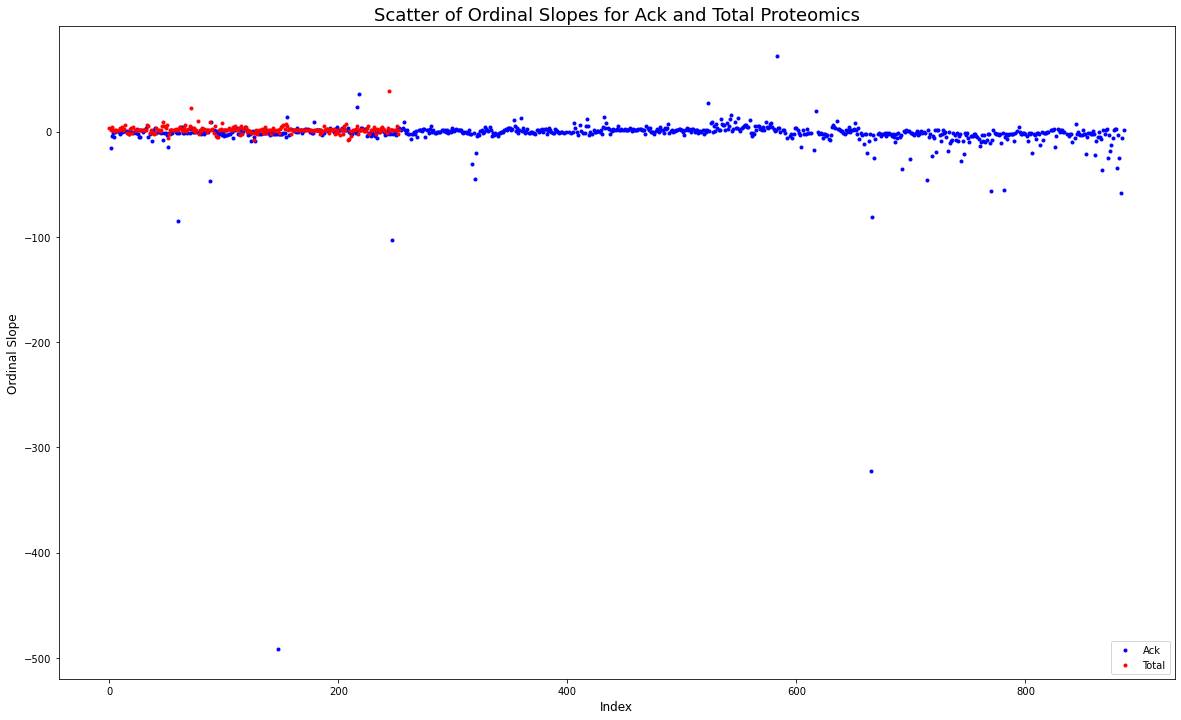

In [401]:
ack_prot = proteomics_ack.copy()
total_prot = proteomics_total.copy()

fig = plt.figure()
ax1 = fig.add_subplot(111)

ack_prot = ack_prot.reset_index()
total_prot = total_prot.reset_index()

ax1.scatter(ack_prot['index'], ack_prot['fc_slope_ordinal'], c='b', marker=".", label='Ack')
ax1.scatter(total_prot['index'], total_prot['fc_slope_ordinal'], c='r', marker=".", label='Total')

plt.legend(loc='lower right');
plt.title('Scatter of Ordinal Slopes for Ack and Total Proteomics', fontsize=18)
plt.xlabel('Index', fontsize=12);
plt.ylabel('Ordinal Slope', fontsize=12);
plt.show();


# Permutation Test - Ack

In [402]:
perm_data_ack = proteomics_ack.iloc[:, 2:5].copy()
perm_data_ack.head()

,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2
1,23.655555,1.104311,-23.409127
2,3.631596,-2.009896,-7.976540
3,3.144754,2.997329,-1.146557
4,8.843813,1.870128,-5.167873
5,3.454298,4.720901,1.250609


## Permutation of Fold Change values

In [403]:
# for index, row in perm_data_ack.iterrows():
#     print(row)
    
betas = []
true_labels = [1,2,3]
true_labels = np.array(true_labels)

for index, row in perm_data_ack.iterrows():
    beta = perm_get_coeff_ordinal(row, true_labels)
    betas.append(beta)

perm_betas = []
for i in range(100):
    perm_labels = random.sample(list(true_labels), k=3)
    perm_labels = np.array(perm_labels)
    for index, row in perm_data_ack.iterrows():
        beta = perm_get_coeff_ordinal(row, perm_labels)
        perm_betas.append(beta)

# Plot hist of perm betas and then take mean of dist and sd and then compare those to the true betas

In [404]:
print("Betas: ", betas[0:10],"\n")
print("Permutation Betas: ", perm_betas[0:10],"\n")

Betas:  [-15.688227265083226, -3.869378532091421, -1.4304370036451943, -4.670561754480701, -0.7345631474040963, 0.820149887356508, 0.02614945345476224, -1.9494177065351792, 0.4132525531515769, -0.30497393673893697] 

Permutation Betas:  [-8.171146076059424, -1.9888814089176707, -1.3812955285091595, -2.346000130710495, -1.156764028776305, 0.811155551017293, -1.195697006918872, -0.6029484139736022, 0.929774554102138, 0.1414178541171009] 



## Permutation of Normalized Abundance Values

In [405]:
ack_norm_abundance = proteomics_ack.iloc[:, 23:41].copy()
na_perm_ack_data = ack_norm_abundance.iloc[:, -6:].copy()
na_perm_ack_data.head()

,Sample 2,Sample 2.1,Sample 3,Sample 3.1,Run 1 Sample 1,Run 1 Sample 2
1,2.565007e+07,2.347327e+07,7.444079e+05,1.394200e+06,9.504020e+05,2.456167e+07
2,1.996863e+07,1.986873e+07,1.960285e+06,3.129560e+06,3.279324e+06,1.026473e+07
3,3.384991e+06,2.036518e+06,2.182054e+06,2.636901e+06,7.890165e+05,2.710754e+06
4,5.415142e+06,5.352579e+06,5.549432e+05,1.568499e+06,5.572330e+05,5.016312e+06
5,2.817557e+07,3.168460e+07,4.075923e+07,3.553434e+07,5.599460e+06,2.945547e+07


In [406]:
# for index, row in na_perm_ack_data.iterrows():
#     print(row)
    
betas = []
true_labels = [1, 1, 2, 2, 3, 3]
true_labels = np.array(true_labels)

for index, row in na_perm_ack_data.iterrows():
    beta = perm_get_coeff_ordinal(row, true_labels)
    betas.append(beta)

perm_betas = []
for i in range(100):
    perm_labels = random.sample(list(true_labels), k=6)
    perm_labels = np.array(perm_labels)
    for index, row in na_perm_ack_data.iterrows():
        beta = perm_get_coeff_ordinal(row, perm_labels)
        perm_betas.append(beta)

# Plot hist of perm betas and then take mean of dist and sd and then compare those to the true betas

In [407]:
print("Betas: ", betas[0:10],"\n")
print("Permutation Betas: ", perm_betas[0:10],"\n")

Betas:  [-4722253.932260519, -5258662.434896862, -384347.56724432437, -1038835.2675080864, -4961049.345731079, 3425216.811787594, -896785.2793274589, -327345500.78478837, 15730366.899303759, -2407148.5970639703] 

Permutation Betas:  [524119.543972443, -9972.675836029834, 639271.4752062093, 214765.75164082146, 5285169.568707155, -4233527.74556426, 2413441.31740079, 6414676.54242239, -19037729.189655818, -23399646.54834708] 



## Permutation of Average Abundance Values

In [408]:
ack_avg_abundance = proteomics_ack.iloc[:, 47:50].copy()
avg_perm_ack_data = ack_avg_abundance.copy()
avg_perm_ack_data.head()

,Sample 3.2,Run 1 Sample 1.1,Run 1 Sample 2.1
1,1.069304e+06,0.643131,0.062668
2,2.544922e+06,0.375895,0.069940
3,2.409478e+06,0.622032,0.351752
4,1.061721e+06,0.000000,0.046675
5,3.814678e+07,0.529685,0.093311


In [409]:
# for index, row in avg_perm_ack_data.iterrows():
#     print(row)
    
betas = []
true_labels = [1, 2, 3]
true_labels = np.array(true_labels)

for index, row in avg_perm_ack_data.iterrows():
    beta = perm_get_coeff_ordinal(row, true_labels)
    betas.append(beta)

perm_betas = []
for i in range(100):
    perm_labels = random.sample(list(true_labels), k=3)
    perm_labels = np.array(perm_labels)
    for index, row in avg_perm_ack_data.iterrows():
        beta = perm_get_coeff_ordinal(row, perm_labels)
        perm_betas.append(beta)

# Plot hist of perm betas and then take mean of dist and sd and then compare those to the true betas

In [410]:
print("Betas: ", betas[0:10],"\n")
print("Permutation Betas: ", perm_betas[0:10],"\n")

Betas:  [-356434.6214406048, -848307.3491374531, -803159.0912172801, -353907.0140793161, -12715594.848853035, -2806121.3578544296, -6015441.83035372, -72182053.37090927, -9574483.985297466, -25759336.273351744] 

Permutation Betas:  [356434.4279529719, 848307.2471521735, 803159.0011241989, 353907.0296377966, 12715594.703394972, 2806121.3093083617, 6015441.762848432, 72182053.38073787, 9574483.697641823, 25759336.231907755] 



# Ack - Calculating slopes using normalized abundance values

In [411]:
proteomics_ack.head(4)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,2.456167e+07,0.643131,Fgb,...,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,1.991868e+07,0.324883,Fgb,...,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,2.710754e+06,0.622032,Lpp;Lpp,...,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311
4,48,5,8.843813,1.870128,-5.167873,-7.005843,-4.670562,5.383860e+06,0.675029,Rai14,...,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685


In [412]:
ack_norm_abundance = proteomics_ack.iloc[:, 21:39].copy()
# Replacing the zero values with the mean of the column for all columns
ack_norm_abundance.replace(0,ack_norm_abundance.mean(axis=0),inplace=True)

ack_norm_abundance.head(5)

,Sample 1 (CS34041),Sample 1 (CS34042),Sample 2 (CS34043),Sample 2 (CS34044),Sample 3 (CS34045),Sample 3 (CS34046),Sample 1 (CS34211),Sample 1 (CS34212),Sample 2 (CS34213),Sample 2 (CS34214),Sample 3 (CS34215),Sample 3 (CS34216),Sample 1,Sample 1.1,Sample 2,Sample 2.1,Sample 3,Sample 3.1
1,5.181951e+05,1.382609e+06,2.565007e+07,2.347327e+07,7.444079e+05,1394200.0,1.741306e+08,1.844918e+08,2.695432e+08,2.620805e+08,2.309529e+08,2.071143e+08,5.181951e+05,1.382609e+06,2.565007e+07,2.347327e+07,7.444079e+05,1.394200e+06
2,2.407685e+06,4.150962e+06,1.077237e+07,9.757086e+06,1.405781e+06,1571231.0,1.773617e+06,1.708704e+06,9.196266e+06,1.011164e+07,5.545039e+05,1.558329e+06,4.181303e+06,5.859666e+06,1.996863e+07,1.986873e+07,1.960285e+06,3.129560e+06
3,4.419733e+05,1.136060e+06,3.384991e+06,2.036518e+06,2.182054e+06,2636901.0,1.741306e+08,1.844918e+08,2.695432e+08,2.620805e+08,2.309529e+08,2.071143e+08,4.419733e+05,1.136060e+06,3.384991e+06,2.036518e+06,2.182054e+06,2.636901e+06
4,3.653060e+08,5.572330e+05,5.181872e+06,4.850751e+06,5.549432e+05,1178109.0,1.741306e+08,1.844918e+08,2.332693e+05,5.018285e+05,2.309529e+08,3.903900e+05,5.394366e+08,5.572330e+05,5.415142e+06,5.352579e+06,5.549432e+05,1.568499e+06
5,7.696705e+06,3.502215e+06,2.751196e+07,3.139897e+07,3.888799e+07,33804952.0,1.539853e+06,3.123327e+06,6.636039e+05,2.856369e+05,1.871234e+06,1.729391e+06,9.236558e+06,6.625542e+06,2.817557e+07,3.168460e+07,4.075923e+07,3.553434e+07


In [413]:
ack_temp = pd.DataFrame()

ack_temp["na_slope_linear"] = ack_norm_abundance.apply(get_coeff_linear, axis=1)
ack_temp["na_slope_ordinal"] = ack_norm_abundance.apply(get_coeff_ordinal, axis=1)

ack_norm_abundance.insert(0, ack_temp["na_slope_linear"].name, ack_temp["na_slope_linear"])
ack_norm_abundance.insert(1, ack_temp["na_slope_ordinal"].name, ack_temp["na_slope_ordinal"])

proteomics_ack.insert(7, ack_norm_abundance["na_slope_linear"].name, ack_norm_abundance["na_slope_linear"])
proteomics_ack.insert(8, ack_norm_abundance["na_slope_ordinal"].name, ack_norm_abundance["na_slope_ordinal"])

In [414]:
ack_norm_abundance.columns

Index(['na_slope_linear', 'na_slope_ordinal', 'Sample 1 (CS34041)',
       'Sample 1 (CS34042)', 'Sample 2 (CS34043)', 'Sample 2 (CS34044)',
       'Sample 3 (CS34045)', 'Sample 3 (CS34046)', 'Sample 1 (CS34211)',
       'Sample 1 (CS34212)', 'Sample 2 (CS34213)', 'Sample 2 (CS34214)',
       'Sample 3 (CS34215)', 'Sample 3 (CS34216)', 'Sample 1', 'Sample 1.1',
       'Sample 2', 'Sample 2.1', 'Sample 3', 'Sample 3.1'],
      dtype='object')

## Log10 Distribution of Normalized Abundance Values

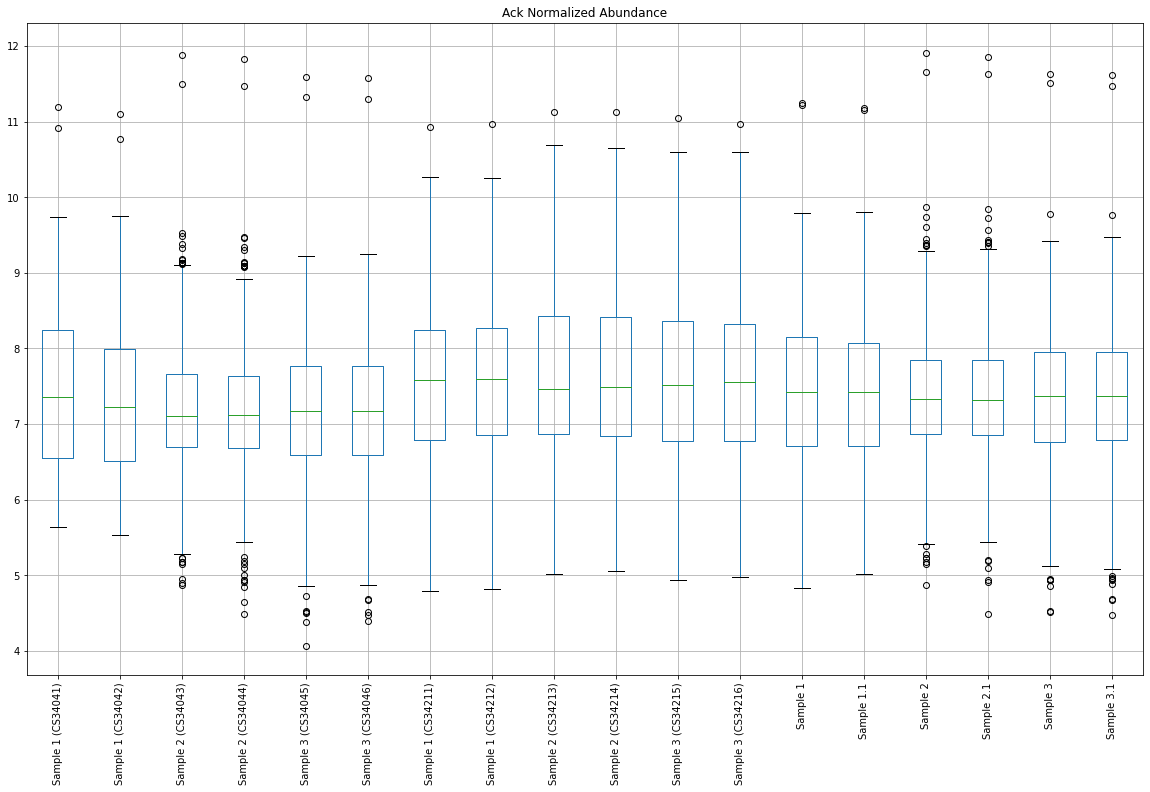

In [415]:
np.log10(ack_norm_abundance.iloc[:, 2:]).boxplot(fontsize=10);
plt.xticks(rotation = 90)
plt.title('Ack Normalized Abundance');


In [416]:
print("Normalized Abundance:", ack_norm_abundance.iloc[:, :2].head(5))
print("\n\nAck Data:", proteomics_ack.iloc[:, 1:9].head(5))

Normalized Abundance:    na_slope_linear  na_slope_ordinal
1     3.069308e+05      3.062986e+05
2     2.731922e+05      2.726295e+05
3     3.326801e+05      3.319948e+05
4    -3.236702e+06     -3.230035e+06
5     6.040811e+05      6.028368e+05


Ack Data:    Index  nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  fc_slope_linear  fc_slope_ordinal  \
1      2  23.655555   1.104311 -23.409127       -23.532341        -15.688227   
2      3   3.631596  -2.009896  -7.976540        -5.804068         -3.869379   
3      4   3.144754   2.997329  -1.146557        -2.145656         -1.430437   
4      5   8.843813   1.870128  -5.167873        -7.005843         -4.670562   
5      6   3.454298   4.720901   1.250609        -1.101845         -0.734563   

   na_slope_linear  na_slope_ordinal  
1     3.069308e+05      3.062986e+05  
2     2.731922e+05      2.726295e+05  
3     3.326801e+05      3.319948e+05  
4    -3.236702e+06     -3.230035e+06  
5     6.040811e+05      6.028368e+05  


In [417]:
ack_norm_abundance.nlargest(columns = ['Sample 1', 'Sample 1.1',
       'Sample 2', 'Sample 2.1', 'Sample 3', 'Sample 3.1'], n=10)

,na_slope_linear,na_slope_ordinal,Sample 1 (CS34041),Sample 1 (CS34042),Sample 2 (CS34043),Sample 2 (CS34044),Sample 3 (CS34045),Sample 3 (CS34046),Sample 1 (CS34211),Sample 1 (CS34212),Sample 2 (CS34213),Sample 2 (CS34214),Sample 3 (CS34215),Sample 3 (CS34216),Sample 1,Sample 1.1,Sample 2,Sample 2.1,Sample 3,Sample 3.1
142,6.640204e+09,6.626527e+09,1.553060e+11,1.248694e+11,7.706448e+11,6.793821e+11,3.879723e+11,3.766781e+11,1.822158e+10,1.812297e+10,4.836651e+10,4.461622e+10,3.963161e+10,3.898649e+10,1.735276e+11,1.429924e+11,8.190113e+11,7.239984e+11,4.276039e+11,4.156646e+11
141,1.041149e+10,1.039005e+10,8.131326e+10,5.966830e+10,3.168898e+11,2.944599e+11,2.104194e+11,2.014280e+11,8.513438e+10,9.204697e+10,1.358088e+11,1.329377e+11,1.125575e+11,9.364276e+10,1.664476e+11,1.517153e+11,4.526985e+11,4.273976e+11,3.229769e+11,2.950708e+11
92,-5.378822e+06,-5.367743e+06,5.462688e+09,5.601990e+09,1.094400e+09,1.332457e+09,1.041069e+09,1.069521e+09,7.315077e+08,7.523733e+08,1.200684e+09,1.201898e+09,7.956514e+08,7.489364e+08,6.194195e+09,6.354363e+09,2.295084e+09,2.534355e+09,1.836721e+09,1.818457e+09
93,-5.378822e+06,-5.367743e+06,5.462688e+09,5.601990e+09,1.094400e+09,1.332457e+09,1.041069e+09,1.069521e+09,7.315077e+08,7.523733e+08,1.200684e+09,1.201898e+09,7.956514e+08,7.489364e+08,6.194195e+09,6.354363e+09,2.295084e+09,2.534355e+09,1.836721e+09,1.818457e+09
194,2.451498e+08,2.446449e+08,1.202673e+09,1.592264e+09,4.544762e+08,6.594556e+08,1.554912e+09,1.636713e+09,3.213216e+09,3.493908e+09,1.466988e+09,1.419902e+09,4.394578e+09,4.181052e+09,4.415889e+09,5.086172e+09,1.921464e+09,2.079357e+09,5.949489e+09,5.817765e+09
24,7.919961e+07,7.903648e+07,1.046147e+09,1.050796e+09,1.952598e+08,2.927308e+08,9.174495e+08,8.778003e+08,2.849055e+09,3.290190e+09,4.995318e+08,5.098835e+08,1.094276e+09,9.892333e+08,3.895201e+09,4.340986e+09,6.947916e+08,8.026143e+08,2.011725e+09,1.867034e+09
458,1.172089e+07,1.169675e+07,2.862598e+09,2.380598e+09,6.035424e+08,5.019887e+08,1.084125e+09,1.105860e+09,4.936746e+08,5.980311e+08,3.292654e+08,3.508516e+08,5.747252e+08,6.264411e+08,3.356273e+09,2.978629e+09,9.328078e+08,8.528403e+08,1.658850e+09,1.732301e+09
136,1.570661e+08,1.567426e+08,1.796913e+09,1.771636e+09,3.337933e+09,2.972032e+09,1.249077e+09,1.275643e+09,1.554543e+09,1.607132e+09,4.018779e+09,4.042582e+09,1.284854e+09,1.300626e+09,3.351457e+09,3.378768e+09,7.356712e+09,7.014614e+09,2.533931e+09,2.576269e+09
461,2.808255e+07,2.802471e+07,2.154976e+09,2.235024e+09,7.212434e+08,7.122274e+08,1.618034e+09,1.590472e+09,5.889124e+08,5.668083e+08,3.080293e+08,3.022932e+08,6.245748e+08,6.110722e+08,2.743889e+09,2.801832e+09,1.029273e+09,1.014521e+09,2.242609e+09,2.201544e+09
125,-2.616202e+07,-2.610813e+07,2.095674e+09,2.333262e+09,5.440394e+08,6.101929e+08,3.506846e+08,3.850412e+08,5.686292e+07,6.264101e+07,6.823649e+07,7.246429e+07,3.302383e+07,3.352852e+07,2.152537e+09,2.395903e+09,6.122759e+08,6.826572e+08,3.837084e+08,4.185697e+08


# Total - Calculating slopes using abundance values
> Used the normalized noise signal as an equivalent for normalized abundace

In [418]:
proteomics_total.head(5)

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,4.949423,3.299615,0.002375,0.020316,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,2.363197,1.575465,0.000000,0.000000,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,6.060145,4.040096,0.026466,0.035343,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,2.298235,1.532157,0.355260,0.012427,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.575398,0.383599,0.530450,0.022924,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977


In [419]:
proteomics_total.columns

Index(['Index', 'Gene Name', 'Protein Name', 'nfc_s2vs1', 'nfc_s3vs1',
       'nfc_s3vs2', 'fc_slope_linear', 'fc_slope_ordinal', 'pv_s2vs1',
       'pv_s3vs1', 'pv_s3vs2', 'Accession', 'Description', 'Protein Type',
       'Peptide Count', 'ss_Sample_1_126', 'ss_Sample_2_127b',
       'ss_Sample_3_130b', 'nss_Sample_1_126', 'nss_Sample_2_127b',
       'nss_Sample_3_130b', 'rr_s2vs1', 'rr_s3vs1', 'rr_s3vs2', 'log2_s2vs1',
       'log2_s3vs1', 'log2_s3vs2', 'norm_log2_s2vs1', 'norm_log2_s3vs1',
       'norm_log2_s3vs2', 'norm_fc2_s2vs1', 'norm_fc2_s3vs1', 'norm_fc2_s3vs2',
       'pv2_s2vs1', 'pv2_s3vs1', 'pv2_s3vs2'],
      dtype='object')

In [420]:
total_norm_abundance = proteomics_total.iloc[:, 18:21].copy()

# Replacing the zero values with the mean of the column for all columns
total_norm_abundance.replace(0,total_norm_abundance.mean(axis=0),inplace=True)

total_norm_abundance

,nss_Sample_1_126,nss_Sample_2_127b,nss_Sample_3_130b
0,339.398029,54.861216,140.679104
1,26.923254,10.677729,17.163142
2,246.392271,27.817241,55.733276
3,12834.100782,10234.832452,26861.112571
4,8441.753541,10154.635284,18602.829232
...,...,...,...
249,5757.394963,4393.797074,9684.624378
250,3971.900332,2773.187748,6594.736316
251,221.937415,32.765275,220.296152
252,3391.836214,10762.822054,2663.928026


In [421]:
total_temp = pd.DataFrame()

total_temp["na_slope_linear"] = total_norm_abundance.apply(get_coeff_linear, axis=1)
total_temp["na_slope_ordinal"] = total_norm_abundance.apply(get_coeff_ordinal, axis=1)

total_norm_abundance.insert(0, total_temp["na_slope_linear"].name, total_temp["na_slope_linear"])
total_norm_abundance.insert(1, total_temp["na_slope_ordinal"].name, total_temp["na_slope_ordinal"])

proteomics_total.insert(8, total_norm_abundance["na_slope_linear"].name, total_norm_abundance["na_slope_linear"])
proteomics_total.insert(9, total_norm_abundance["na_slope_ordinal"].name, total_norm_abundance["na_slope_ordinal"])

## Log10 Distribution of Normalized Sum Signal Values

<ipython-input-422-a14c3eca74b9>:1: RuntimeWarning: invalid value encountered in log10
  np.log10(total_norm_abundance).boxplot(fontsize=10);


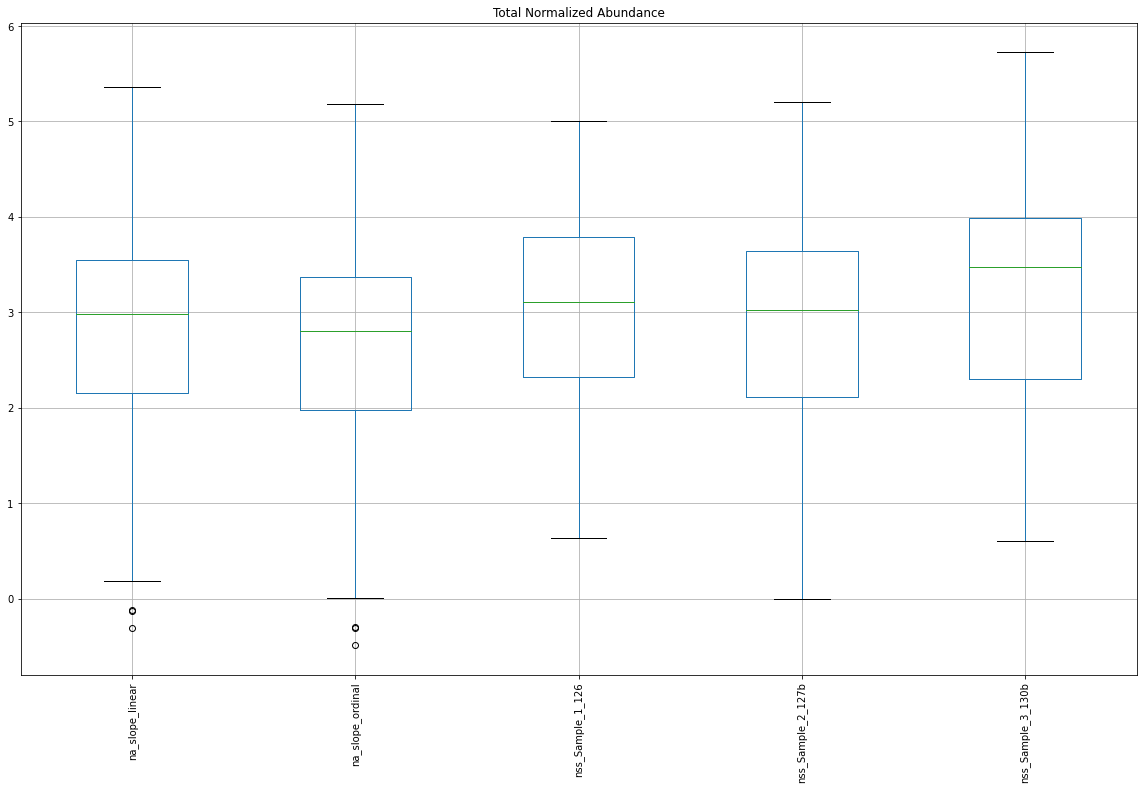

In [422]:
np.log10(total_norm_abundance).boxplot(fontsize=10);
plt.xticks(rotation = 90)
plt.title('Total Normalized Abundance');

In [423]:
print("Normalized Noise Signal:\n", total_norm_abundance.head(5))
print("\nTotal Data:\n", proteomics_total.iloc[:, 3:10].head(5))

Normalized Noise Signal:
    na_slope_linear  na_slope_ordinal  nss_Sample_1_126  nss_Sample_2_127b  \
0       -99.359462        -66.239642        339.398029          54.861216   
1        -4.880056         -3.253371         26.923254          10.677729   
2       -95.329497        -63.552998        246.392271          27.817241   
3      7013.505895       4675.670596      12834.100782       10234.832452   
4      5080.537846       3387.025230       8441.753541       10154.635284   

   nss_Sample_3_130b  
0         140.679104  
1          17.163142  
2          55.733276  
3       26861.112571  
4       18602.829232  

Total Data:
    nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  fc_slope_linear  fc_slope_ordinal  \
0  -6.743289  -2.169717   3.155556         4.949423          3.299615   
1  -2.748379  -1.410763   1.978015         2.363197          1.575465   
2  -9.654748  -3.975903   2.465541         6.060145          4.040096   
3  -1.366824   2.327208   3.229647         2.298235          1.5321

# Overlap Of Proteins in Total and Ack

In [424]:
proteomics_ack['First Gene Name'] = proteomics_ack['Gene Name'].str.split(';').str[0]
proteomics_ack['First Protein Name'] = proteomics_ack['Protein Name'].str.split(';').str[0]
proteomics_ack.head(3)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,na_slope_linear,na_slope_ordinal,Max Abundance,...,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2,First Gene Name,First Protein Name
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,306930.794735,306298.599483,2.456167e+07,...,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682,Fgb,FGB
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,273192.203970,272629.501181,1.991868e+07,...,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136,Fgb,FGB
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,332680.078740,331994.846858,2.710754e+06,...,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311,Lpp,LPP


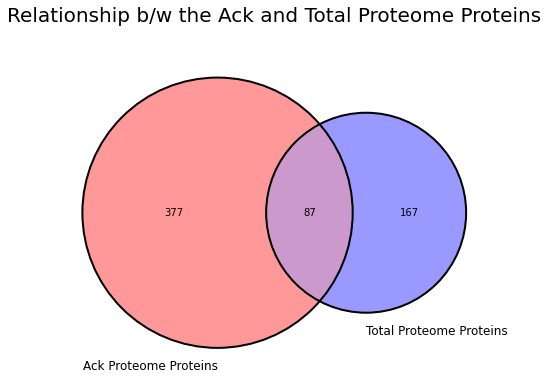

In [425]:
plt.figure(facecolor="white", figsize = (10,6))

# make the venn diagram
v = venn2([set(proteomics_ack['First Protein Name']), set(proteomics_total['Protein Name'])],
set_labels=['Ack Proteome Proteins', 'Total Proteome Proteins'])

v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)

# add circle outlines
c = venn2_circles([set(proteomics_ack['First Protein Name']), set(proteomics_total['Protein Name'])],
                  linestyle='solid')
plt.title('Relationship b/w the Ack and Total Proteome Proteins\n', fontsize=20)
plt.show()

## Making data set of the common proteins between the total and ack data sets.

In [426]:
total = proteomics_total['Protein Name'].copy().tolist()
ack = proteomics_ack['First Protein Name'].copy().tolist()

common_proteins = proteomics_ack[proteomics_ack['First Protein Name'].isin(total)]
common_proteins = common_proteins['First Protein Name'].copy() #.drop_duplicates() # .tolist()
# Number of Unique Common Proteins: 87

ack_proteins = proteomics_ack[~proteomics_ack['First Protein Name'].isin(total)]
ack_proteins = ack_proteins['First Protein Name'].copy() #.drop_duplicates()
# Number of Unique Ack Proteins: 377

total_proteins = proteomics_total[~proteomics_total['Protein Name'].isin(ack)]
total_proteins = total_proteins['Protein Name'].copy() #.drop_duplicates()
# Number of Unique Total Proteins: 167

# c_prot = proteomics_ack.loc[proteomics_ack['First Protein Name'].isin(common_proteins.tolist())]
# c_prot

print(common_proteins.tolist(), '\n\nNumber of Common Proteins:', len(common_proteins),"\n")
print(ack_proteins.tolist(), '\n\nNumber of Ack Proteins:', len(ack_proteins),"\n")
print(total_proteins.tolist(), '\n\nNumber of Total Proteins:', len(total_proteins),"\n")

['FGB', 'FGB', 'CLU', 'GBAS', 'APOA1', 'ACAA2', 'ACADL', 'ACADL', 'ACADL', 'ACADVL', 'ACADVL', 'ACADVL', 'ACADVL', 'THEM2', 'THEM2', 'THEM2', 'THEM2', 'ADH1C', 'ATP5A1', 'ATP5A1', 'ATP5A1', 'ATP5A1', 'ATP5A1', 'ATP5A1', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5B', 'ATP5D', 'ATP5E', 'ATP5E', 'ATP5E', 'CKMT2', 'CKMT2', 'CKMT2', 'COX4I1', 'COX5A', 'COX5B', 'COX6C', 'CS', 'CS', 'CS', 'CS', 'CYC1', 'DECR1', 'DECR1', 'ENO3', 'ENO3', 'ENO3', 'ENO3', 'ENO3', 'ENO3', 'ENO3', 'ETFDH', 'GOT2', 'GOT2', 'GOT2', 'GOT2', 'GOT2', 'GOT2', 'HADHSC', 'HADHA', 'HADHA', 'HADHA', 'HADHA', 'HADHA', 'HADHA', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IDH2', 'IVD', 'LDH-B', 'MDH1', 'MDH1', 'MDH2', 'MDH2', 'NDUFA10', 'NDUFA10', 'NDUFA4', 'NDUFA4', 'NDUFA4', 'NDUFA4', 'NDUFA4', 'NDUFA5', 'NDUFA6', 'NDUFB3', 'NDUFS1', 'NDUFS1', 'NDUFS6', 'NDUFV1', 'NDUFV1', 'NDUFV1', 'PDHB', 'PGAM2', 'PYGM', 'SOD2', 'SCS-beta', 'UQCRC2', 'UQCRC2', 'UQCRC2', 'UQCRC2

In [427]:
c_data = {i:[common_proteins.tolist().count(i)] for i in common_proteins.tolist()}
print(c_data)
print(len(c_data))
common_proteins = pd.DataFrame.from_dict(c_data, orient='index', columns=['counts'])
print(common_proteins.head(), "\n")

a_data = {i:[ack_proteins.tolist().count(i)] for i in ack_proteins.tolist()}
print(a_data)
print(len(a_data))
ack_proteins = pd.DataFrame.from_dict(a_data, orient='index', columns=['counts'])
print(ack_proteins.head(), "\n")

t_data = {i:[total_proteins.tolist().count(i)] for i in total_proteins.tolist()}
print(t_data)
print(len(t_data))
total_proteins = pd.DataFrame.from_dict(t_data, orient='index', columns=['counts'])
print(total_proteins.head(), "\n")

{'FGB': [2], 'CLU': [1], 'GBAS': [1], 'APOA1': [1], 'ACAA2': [1], 'ACADL': [3], 'ACADVL': [4], 'THEM2': [4], 'ADH1C': [1], 'ATP5A1': [6], 'ATP5B': [9], 'ATP5D': [1], 'ATP5E': [3], 'CKMT2': [3], 'COX4I1': [1], 'COX5A': [1], 'COX5B': [1], 'COX6C': [1], 'CS': [4], 'CYC1': [1], 'DECR1': [2], 'ENO3': [7], 'ETFDH': [1], 'GOT2': [6], 'HADHSC': [1], 'HADHA': [6], 'IDH2': [10], 'IVD': [1], 'LDH-B': [1], 'MDH1': [2], 'MDH2': [2], 'NDUFA10': [2], 'NDUFA4': [5], 'NDUFA5': [1], 'NDUFA6': [1], 'NDUFB3': [1], 'NDUFS1': [2], 'NDUFS6': [1], 'NDUFV1': [3], 'PDHB': [1], 'PGAM2': [1], 'PYGM': [1], 'SOD2': [1], 'SCS-beta': [1], 'UQCRC2': [5], 'CKM': [2], 'AK1': [1], 'FABP3': [3], 'ACADM': [1], 'ACO2': [5], 'ATP5I': [4], 'ATP5L': [3], 'ATP5F1': [11], 'ATP5H': [7], 'ATP5J': [3], 'ATP5O': [8], 'ZCD1': [1], 'COQ9': [1], 'COX6B1': [2], 'ECH1': [1], 'ETFB': [1], 'GATD3A': [3], 'MACROD1': [1], 'NUEM': [2], 'NDUFB1': [1], 'NDUFB9': [1], 'UCP1': [1], 'UQCRB': [2], 'MYH6': [28], 'MRLC2V': [5], 'MYL3': [3], 'TNNI3': 

## Making CSV of Proteins for Gene Enrichment Analysis

In [428]:
# common_proteins.columns = ['protein', 'count']
common_proteins.to_csv('data/common_proteins.csv')

ack_proteins.to_csv('data/ack_proteins.csv')

total_proteins.to_csv('data/total_proteins.csv')

# Visualizing Normalized Abundance Distribution

In [429]:
ack_norm_abundance.head()

,na_slope_linear,na_slope_ordinal,Sample 1 (CS34041),Sample 1 (CS34042),Sample 2 (CS34043),Sample 2 (CS34044),Sample 3 (CS34045),Sample 3 (CS34046),Sample 1 (CS34211),Sample 1 (CS34212),Sample 2 (CS34213),Sample 2 (CS34214),Sample 3 (CS34215),Sample 3 (CS34216),Sample 1,Sample 1.1,Sample 2,Sample 2.1,Sample 3,Sample 3.1
1,3.069308e+05,3.062986e+05,5.181951e+05,1.382609e+06,2.565007e+07,2.347327e+07,7.444079e+05,1394200.0,1.741306e+08,1.844918e+08,2.695432e+08,2.620805e+08,2.309529e+08,2.071143e+08,5.181951e+05,1.382609e+06,2.565007e+07,2.347327e+07,7.444079e+05,1.394200e+06
2,2.731922e+05,2.726295e+05,2.407685e+06,4.150962e+06,1.077237e+07,9.757086e+06,1.405781e+06,1571231.0,1.773617e+06,1.708704e+06,9.196266e+06,1.011164e+07,5.545039e+05,1.558329e+06,4.181303e+06,5.859666e+06,1.996863e+07,1.986873e+07,1.960285e+06,3.129560e+06
3,3.326801e+05,3.319948e+05,4.419733e+05,1.136060e+06,3.384991e+06,2.036518e+06,2.182054e+06,2636901.0,1.741306e+08,1.844918e+08,2.695432e+08,2.620805e+08,2.309529e+08,2.071143e+08,4.419733e+05,1.136060e+06,3.384991e+06,2.036518e+06,2.182054e+06,2.636901e+06
4,-3.236702e+06,-3.230035e+06,3.653060e+08,5.572330e+05,5.181872e+06,4.850751e+06,5.549432e+05,1178109.0,1.741306e+08,1.844918e+08,2.332693e+05,5.018285e+05,2.309529e+08,3.903900e+05,5.394366e+08,5.572330e+05,5.415142e+06,5.352579e+06,5.549432e+05,1.568499e+06
5,6.040811e+05,6.028368e+05,7.696705e+06,3.502215e+06,2.751196e+07,3.139897e+07,3.888799e+07,33804952.0,1.539853e+06,3.123327e+06,6.636039e+05,2.856369e+05,1.871234e+06,1.729391e+06,9.236558e+06,6.625542e+06,2.817557e+07,3.168460e+07,4.075923e+07,3.553434e+07


In [430]:
total_norm_abundance.head()

,na_slope_linear,na_slope_ordinal,nss_Sample_1_126,nss_Sample_2_127b,nss_Sample_3_130b
0,-99.359462,-66.239642,339.398029,54.861216,140.679104
1,-4.880056,-3.253371,26.923254,10.677729,17.163142
2,-95.329497,-63.552998,246.392271,27.817241,55.733276
3,7013.505895,4675.670596,12834.100782,10234.832452,26861.112571
4,5080.537846,3387.025230,8441.753541,10154.635284,18602.829232


## Distribution Plots

<ipython-input-431-b75b7d7c61c6>:1: RuntimeWarning: invalid value encountered in log10
  np.log10(ack_norm_abundance).boxplot(fontsize=10);


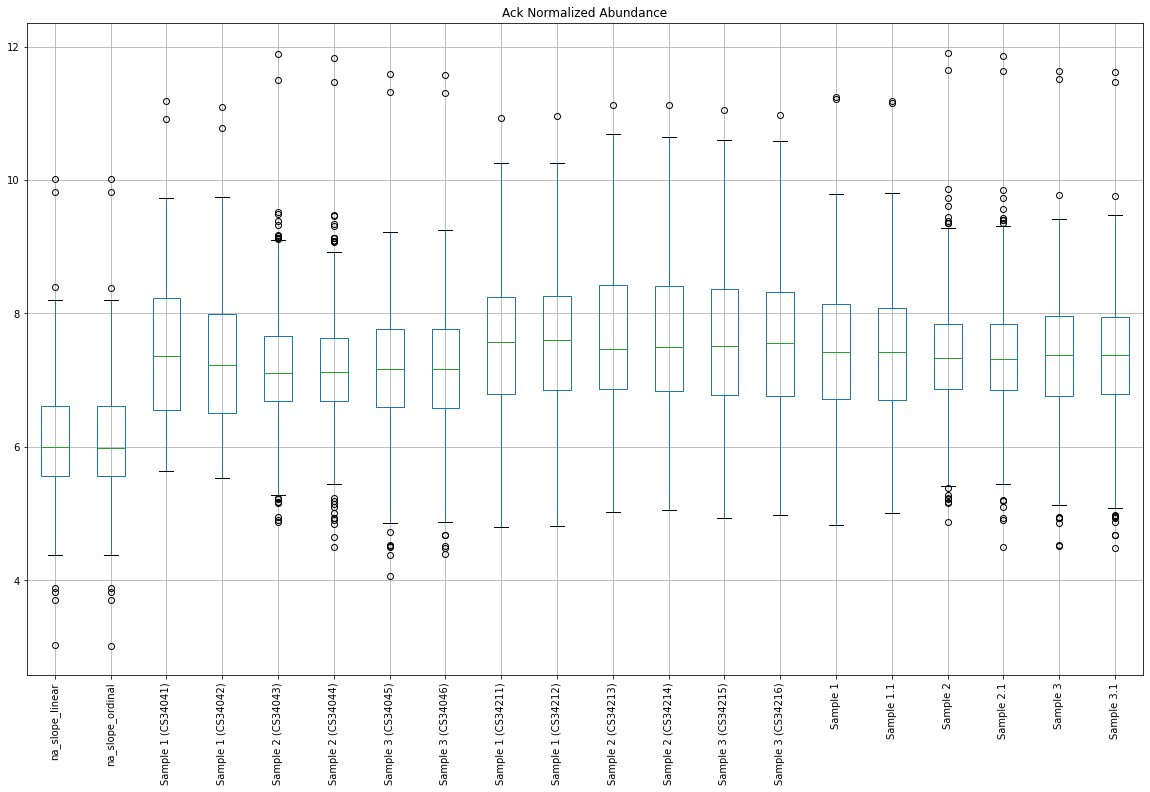

In [431]:
np.log10(ack_norm_abundance).boxplot(fontsize=10);
plt.xticks(rotation = 90)
plt.title('Ack Normalized Abundance');

<ipython-input-432-67152d9bca99>:1: RuntimeWarning: invalid value encountered in log10
  np.log10(total_norm_abundance).boxplot(fontsize=10);


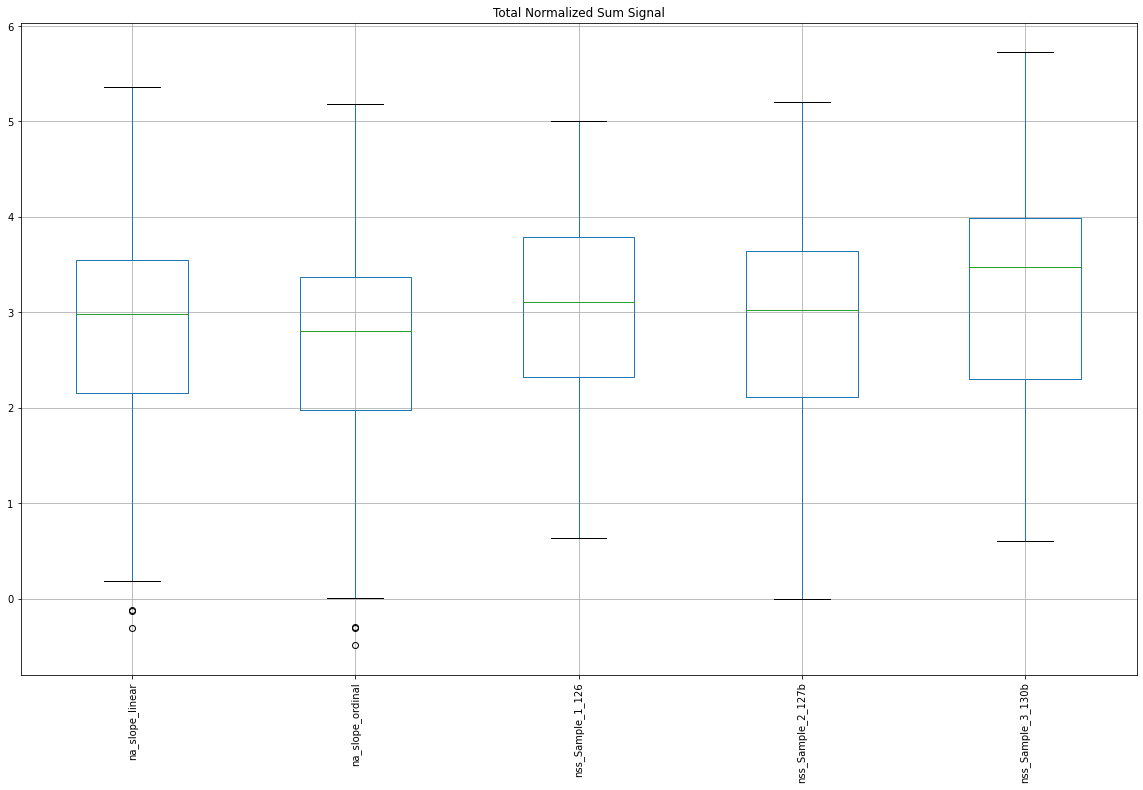

In [432]:
np.log10(total_norm_abundance).boxplot(fontsize=10);
plt.xticks(rotation = 90)
plt.title('Total Normalized Sum Signal');

# ANOVA - Fold Change

In [433]:
ack_data = proteomics_ack.copy()
ack_data.head()

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,na_slope_linear,na_slope_ordinal,Max Abundance,...,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2,First Gene Name,First Protein Name
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,3.069308e+05,3.062986e+05,2.456167e+07,...,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682,Fgb,FGB
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,2.731922e+05,2.726295e+05,1.991868e+07,...,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136,Fgb,FGB
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,3.326801e+05,3.319948e+05,2.710754e+06,...,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311,Lpp,LPP
4,48,5,8.843813,1.870128,-5.167873,-7.005843,-4.670562,-3.236702e+06,-3.230035e+06,5.383860e+06,...,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685,Rai14,RAI14
5,68,6,3.454298,4.720901,1.250609,-1.101845,-0.734563,6.040811e+05,6.028368e+05,3.814678e+07,...,3.903240,3.454298,4.720901,1.250609,mouse,-1.266603,3.470292,2.203689,Ywhaz,14-3-3 zeta


In [434]:
import pandas as pd
import seaborn as sns
# load data file
ack = ack_data.iloc[:, 1:5].copy()
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
a_melt = pd.melt(ack, id_vars=['Index'], value_vars=['nfc_s2vs1', 'nfc_s3vs1', 'nfc_s3vs2'])
# replace column names
a_melt.columns = ['Index', 'samples', 'value']
a_melt.head()

,Index,samples,value
0,2,nfc_s2vs1,23.655555
1,3,nfc_s2vs1,3.631596
2,4,nfc_s2vs1,3.144754
3,5,nfc_s2vs1,8.843813
4,6,nfc_s2vs1,3.454298


In [435]:
print(np.isnan(a_melt['Index']).any())

print(np.isinf(a_melt['Index']).any())

a_melt['value'] = np.nan_to_num(a_melt['value'], nan = a_melt['value'].mean())

False
False


In [436]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(ack_data['nfc_s2vs1'], ack_data['nfc_s3vs1'], ack_data['nfc_s3vs2'])
print(fvalue, pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(samples)', data=a_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

9.55216166276864 7.364121841199373e-05


,sum_sq,df,F,PR(>F)
C(samples),1.891757e+04,2.0,9.552162,0.000074
Residual,2.507249e+06,2532.0,NaN,NaN


## Total Data

In [437]:
total_data = proteomics_total.copy()
total_data.head()

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,fc_slope_linear,fc_slope_ordinal,na_slope_linear,na_slope_ordinal,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,norm_fc2_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,4.949423,3.299615,-99.359462,-66.239642,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,2.363197,1.575465,-4.880056,-3.253371,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,6.060145,4.040096,-95.329497,-63.552998,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,2.298235,1.532157,7013.505895,4675.670596,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.575398,0.383599,5080.537846,3387.025230,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977


In [438]:
import pandas as pd
import seaborn as sns

total = total_data[['Index', 'nfc_s2vs1', 'nfc_s3vs1', 'nfc_s3vs2']].copy()
print(total.head())

t_melt = pd.melt(total, id_vars=['Index'], value_vars=['nfc_s2vs1', 'nfc_s3vs1', 'nfc_s3vs2'])
# replace column names
t_melt.columns = ['Index', 'samples', 'value']
t_melt.head()

   Index  nfc_s2vs1  nfc_s3vs1  nfc_s3vs2
0      1  -6.743289  -2.169717   3.155556
1      2  -2.748379  -1.410763   1.978015
2      3  -9.654748  -3.975903   2.465541
3      4  -1.366824   2.327208   3.229647
4      5   1.103580   2.450321   2.254376


,Index,samples,value
0,1,nfc_s2vs1,-6.743289
1,2,nfc_s2vs1,-2.748379
2,3,nfc_s2vs1,-9.654748
3,4,nfc_s2vs1,-1.366824
4,5,nfc_s2vs1,1.103580


In [439]:
import scipy.stats as stats

# print(np.shape(total_data['nfc_s2vs1']))
# print(np.shape(total_data['nfc_s3vs1']))
# print(np.shape(total_data['nfc_s3vs2']))

fvalue, pvalue = stats.f_oneway(total['nfc_s2vs1'], total['nfc_s3vs1'], total['nfc_s3vs2'])
print(fvalue, pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(samples)', data=t_melt).fit()
total_anova_table = sm.stats.anova_lm(model, typ=2)
total_anova_table

66.86583462767253 1.7912519345547014e-27


,sum_sq,df,F,PR(>F)
C(samples),3636.289240,2.0,66.865835,1.791252e-27
Residual,20637.920309,759.0,NaN,NaN


# Clustering of Fold Change

## Ack Data

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

n_samples:  2535  n_features:  2
n_digits:  3
Centroids:  [7.481570348902914e-07, -0.5000041608712218, 0.5000034127141869]


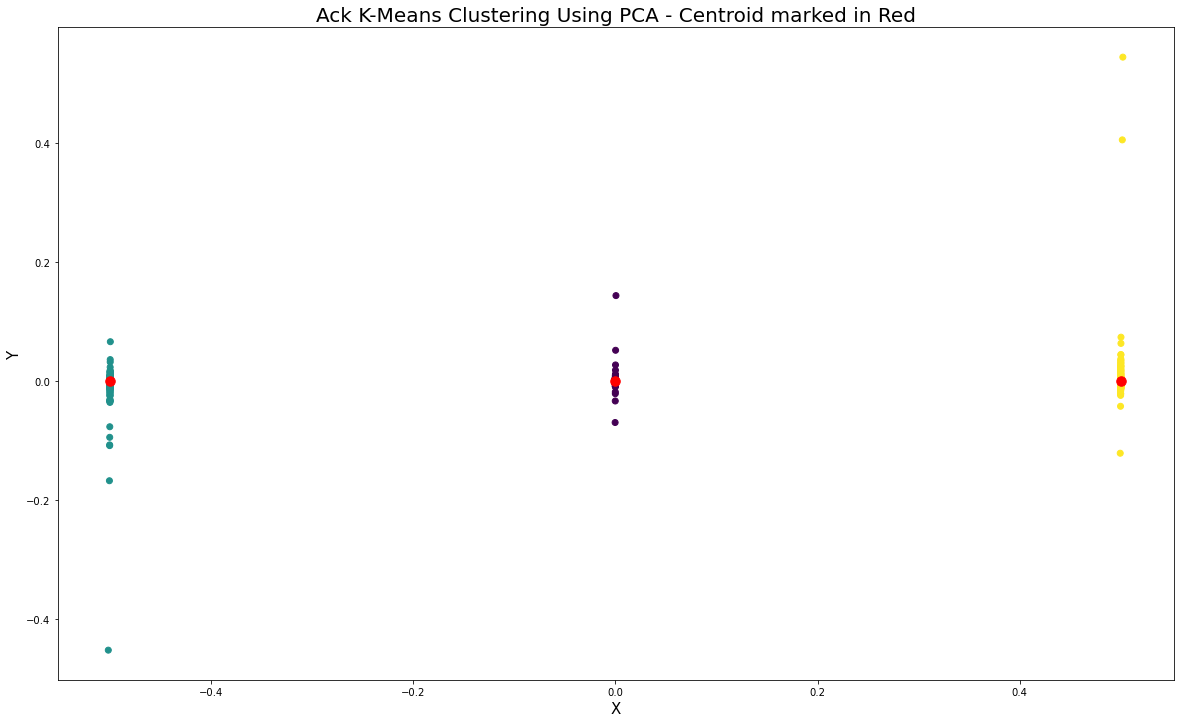

In [441]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

a_melt['samples'] = a_melt['samples'].replace('nfc_s2vs1', 0)
a_melt['samples'] = a_melt['samples'].replace('nfc_s3vs1', 1)
a_melt['samples'] = a_melt['samples'].replace('nfc_s3vs2', 2)
targets = a_melt['samples']
data = a_melt.iloc[:, 1:]
#print(data)

n_samples, n_features = data.shape
print("n_samples: ", n_samples, " n_features: ", n_features)
n_digits = len(np.unique(targets))
print("n_digits: ", n_digits)
labels = targets
# print(labels)

data = scaler.fit_transform(data)
reduced_data = PCA(n_components=2).fit_transform(data)
approx_df = pd.DataFrame(reduced_data)
kmeans = KMeans(n_clusters=n_digits, random_state=0).fit(reduced_data)
centroids = kmeans.cluster_centers_
print("Centroids: ", list(centroids[:, 0]))
approx_df['cluster'] = kmeans.labels_
# print(approx_df['cluster'])
approx_df['labels'] = labels


plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.title('Ack K-Means Clustering Using PCA - Centroid marked in Red', fontsize = 20)
plt.scatter(approx_df[[0]], approx_df[[1]], c=approx_df['cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], color="r", s = 90);

## Total Data

n_samples:  762  n_features:  2
n_digits:  3
Centroids:  [0.5006269831642873, -0.5003715489433022, -0.00025543422098535775]


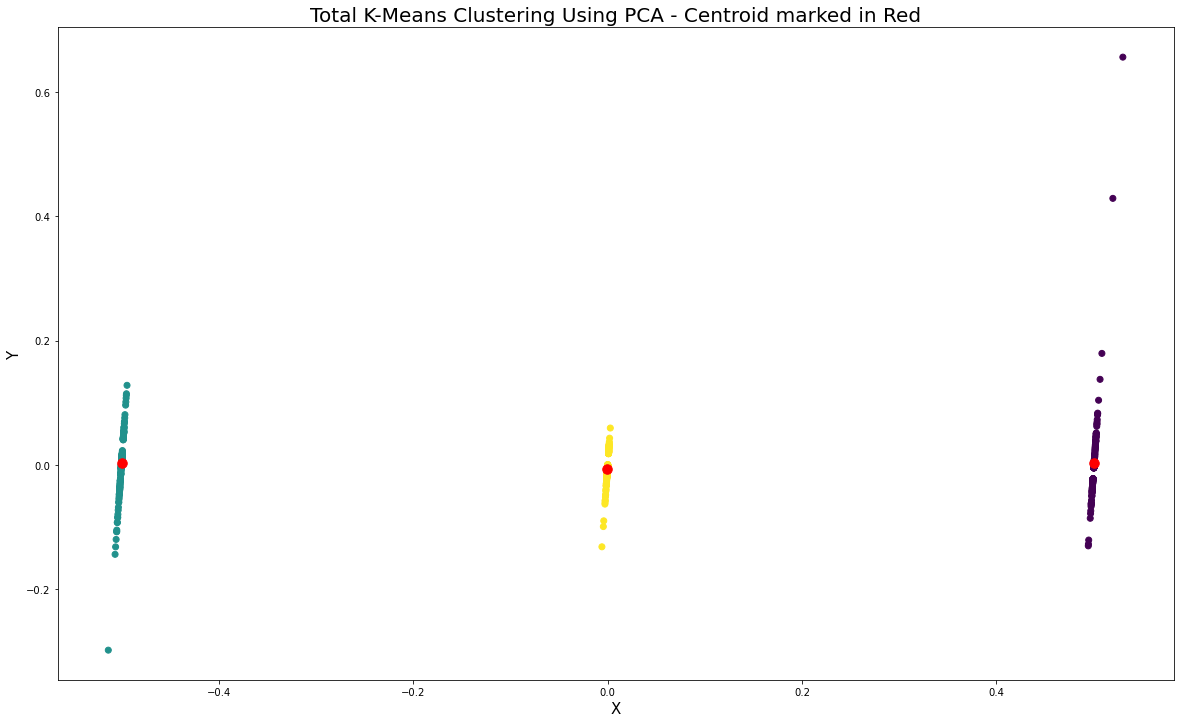

In [442]:
t_melt['samples'] = t_melt['samples'].replace('nfc_s2vs1', 0)
t_melt['samples'] = t_melt['samples'].replace('nfc_s3vs1', 1)
t_melt['samples'] = t_melt['samples'].replace('nfc_s3vs2', 2)
targets = t_melt['samples']
data = t_melt.iloc[:, 1:]
# print(data)

n_samples, n_features = data.shape
print("n_samples: ", n_samples, " n_features: ", n_features)
n_digits = len(np.unique(targets))
print("n_digits: ", n_digits)
labels = targets
# print(labels)

data = scaler.fit_transform(data)
reduced_data = PCA(n_components=2).fit_transform(data)
approx_df = pd.DataFrame(reduced_data)
kmeans = KMeans(n_clusters=n_digits, random_state=0).fit(reduced_data)
centroids = kmeans.cluster_centers_
print("Centroids: ", list(centroids[:, 0]))
approx_df['cluster'] = kmeans.labels_
# print(approx_df['cluster'])
approx_df['labels'] = labels


plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.title('Total K-Means Clustering Using PCA - Centroid marked in Red', fontsize = 20)
plt.scatter(approx_df[[0]], approx_df[[1]], c=approx_df['cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], color="r", s = 90);